In [1]:
!pip install tensorly

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import tensorly

Using numpy backend.


In [4]:
#scarichiamo il nostro database
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
import numpy as np
import tensorly
#scegliamo la nostra immagine di test
label_test = 3
#lavoriamo sul dataset di test
Dataset_test=np.asarray(mnist.test.images).reshape(10000,28,28)
DTest_num=Dataset_test[(mnist.test.labels[:,label_test])==1,:,:]
test_range=DTest_num.shape[0]
test_range

1010

In [6]:
import tensorly.decomposition
#carichiamo le immagini di training ed estraiamone solo quelle di un numero
Dataset_image=np.asarray(mnist.train.images).reshape(55000,28,28) #riassettiamo il tensore delle dimensioni che vogliamo
n_prove=300
label=3
porzione=500
label_test = 3
residuo_matrix=np.zeros((n_prove,10))
residuo_matrix.shape
type(mnist.train.images)

numpy.ndarray

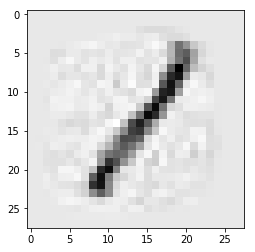

In [50]:
import matplotlib.pyplot as plt
#lable è il nostro numero di controllo
#carichiamo il dataset di training per le immagini dove l'immagine ha la nostra lable
Dataset_num= Dataset_image[(mnist.train.labels[:,label])==1,:,:]
#Dataset_num.shape #per sapere com'è composto il dataset

#prendiamo solo 150 elementi del dataset imagini relativo al numero

Dataset_num=Dataset_num[:porzione,:,:]
#per controllare Dataset_num.shape

#scegliamo la nostra immagine di test

#lavoriamo sul dataset di test
Dataset_test=np.asarray(mnist.test.images).reshape(10000,28,28)
DTest_num=Dataset_test[(mnist.test.labels[:,label_test])==1,:,:]
#prendiamo una a caso tra le nostre immagini di test relative alla label numero 5
rand_img=DTest_num[50,:,:]; #lavorando sul dataset di training
#lavorando con python dobbiamo permutare gli assi per far quadrare i calcoli
DT = np.transpose(Dataset_num)
U1, s1, V1 = np.linalg.svd(tensorly.unfold(DT,0))
U2, s2, V2 = np.linalg.svd(tensorly.unfold(DT,1))
U3, s3, V3 = np.linalg.svd(tensorly.unfold(DT,2))
#print(V3.shape)
#sappiamo che usando la SVD U1,U2,U3 sono ortogonali, quindi possiamo utilizzare la trasposta
#possiamo dare k valori a U123 per poter fare la compressione
core=tensorly.tenalg.mode_dot(DT, np.transpose(U1), mode=0)
core=tensorly.tenalg.mode_dot(core, np.transpose(U2), mode=1)
core=tensorly.tenalg.mode_dot(core, np.transpose(U3), mode=2)

#prepariamo il confronto
#diamo il numero di basi e dopo creiamo la matrice con un numero di zeri uguali alla base calcolata
Temp=np.zeros(rand_img.shape)#Creiamo l'immagine vuota della stessa granzezza del numero preso per il test
num_basi=core.shape[2] #150 perchè la misura del core è (28.28.150)
tensore_basi=np.zeros(num_basi)#abbiamo costruito un tensore con 150 elementi vuoti

#calcoliamo la nostra approssimazione X dove la prima matrice è la più significativa
for i in range(120):#studiare le percentuali per poter stabilire il giusto range--------------
    X=tensorly.tenalg.mode_dot(core[:,:,i],U1, mode=0) #prodotto modo 1 tensore - matrice fattore A
    X=tensorly.tenalg.mode_dot(X,U2,mode=1)#prodotto modo 2 del tensore precedente- matrice fattore B
    X=np.transpose(X)
    tensore_basi[i]=np.sum(rand_img*X)/np.sum(X*X)
    Temp = Temp + tensore_basi[i]*X 
plt.imshow(Temp, cmap='Greys', interpolation='None')


Text(0,0.5,'Singular values')

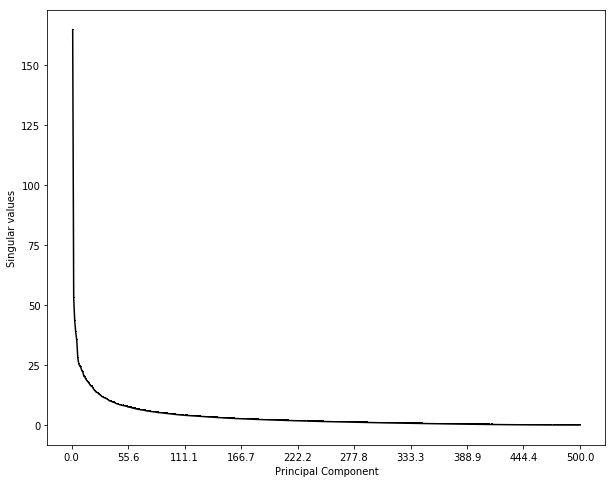

In [70]:
#quanti numeri servono per avere una giusta approssimazione?
#valori singolari modo 3
(size_im1,size_im2, num_im) = core.shape
sz =np.zeros(num_im)
for j in range(0,num_im):
   sz[j]= np.linalg.norm(core[:,:,j],'fro')
fig = plt.figure(figsize=(10,8))
sing_vals = np.arange(num_im) + 1
plt.plot(sing_vals, sz, color='black',marker=',')
plt.xlabel('Principal Component')
plt.xticks(np.linspace(0,num_im,10,endpoint=True))
plt.ylabel('Singular values')


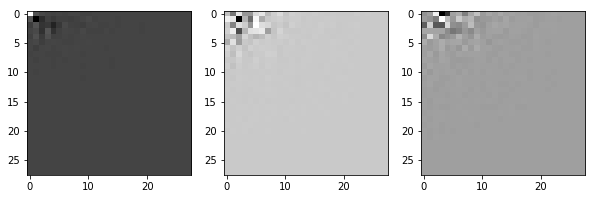

In [28]:
import matplotlib.pyplot as plt
#prime 3 approssimazioni avvenute perchè abbiamo estratto questi dati dalle nostre 150 immagini
f = plt.figure(figsize=(10,10));
for i in range(3):
   plt.subplot(1,3,i+1)
   A1=tensorly.tenalg.mode_dot(core[:,:,i], U1, mode=0)
   A1=tensorly.tenalg.mode_dot(A1, U2, mode=1)
   A1 = np.transpose(A1)
   plt.imshow(core[:,:,i], cmap='Greys', interpolation='None')

In [7]:
Dataset_image=np.asarray(mnist.train.images).reshape(55000,28,28) #riassettiamo il tensore delle dimensioni che vogliamo
Dataset_test=np.asarray(mnist.test.images).reshape(10000,28,28)
n_prove=300
label=3
porzione=500
label_test=3
basi=10

In [8]:
import tensorly.decomposition
import matplotlib.pyplot as plt
import tensorly.decomposition
import random as random
from numpy import linalg as la
def HOSVD(Dataset_image,Dataset_test,label,label_test,basi,porzione,n_prove):
    residuo_matrix=np.zeros((n_prove,basi))
    for t_range in range(n_prove):    
        for label in range(basi):
            Dataset_num= Dataset_image[(mnist.train.labels[:,label])==1,:,:]
            Dataset_num=Dataset_num[:porzione,:,:]
            #lavoriamo sul dataset di test
            
            DTest_num=Dataset_test[(mnist.test.labels[:,label_test])==1,:,:]
            test_image=DTest_num[t_range,:,:]; #lavorando sul dataset di training
            #lavorando con python dobbiamo permutare gli assi per far quadrare i calcoli
            DT = np.transpose(Dataset_num)
            U1, s1, V1 = np.linalg.svd(tensorly.unfold(DT,0))
            U2, s2, V2 = np.linalg.svd(tensorly.unfold(DT,1))
            U3, s3, V3 = np.linalg.svd(tensorly.unfold(DT,2))
            #print(V3.shape)
            #sappiamo che usando la SVD U1,U2,U3 sono ortogonali, quindi possiamo utilizzare la trasposta
            #possiamo dare k valori a U123 per poter fare la compressione
            core=tensorly.tenalg.mode_dot(DT, np.transpose(U1), mode=0)
            core=tensorly.tenalg.mode_dot(core, np.transpose(U2), mode=1)
            core=tensorly.tenalg.mode_dot(core, np.transpose(U3), mode=2)

            #prepariamo il confronto
            #diamo il numero di basi e dopo creiamo la matrice con un numero di zeri uguali alla base calcolata
            Temp=np.zeros(test_image.shape)#Creiamo l'immagine vuota della stessa granzezza del numero preso per il test
            num_basi=core.shape[2] #150 perchè la misura del core è (28.28.150)
            tensore_basi=np.zeros(num_basi)#abbiamo costruito un tensore con 150 elementi vuoti

            #calcoliamo la nostra approssimazione X dove la prima matrice è la più significativa
            for i in range(porzione):#studiare le percentuali per poter stabilire il giusto range--------------
                X=tensorly.tenalg.mode_dot(core[:,:,i],U1, mode=0) #prodotto modo 1 tensore - matrice fattore A
                X=tensorly.tenalg.mode_dot(X,U2,mode=1)#prodotto modo 2 del tensore precedente- matrice fattore B
                X=np.transpose(X)
                tensore_basi[i]=np.sum(test_image*X)/np.sum(X*X)
                Temp = Temp + tensore_basi[i]*X 
            
            residuo=tensorly.norm(test_image-Temp)**2/tensorly.norm(test_image)**2
            residuo_matrix[t_range][label]=residuo
    return residuo_matrix

In [9]:
def statistica(residui,n_test,label_test):
    statistica_iniziale=0
    for i in range(n_test):
        a=list(residui[i])
        minimo =min(a)
        if(a[label_test]==minimo):
            statistica_iniziale=statistica_iniziale+1 
    return 100*statistica_iniziale/n_test

In [ ]:
#funzione che calcola le percentuali di precisione per ogni label_test
#inoltre calcola la variazione di questa percentuale se cambiamo la porzione
#del database di training
general=np.zeros((5,10),float)
i=0
for porzione in range (100,160,10):
    for label_test in range(10):
        r=HOSVD(Dataset_image,Dataset_test,label,label_test,basi,porzione,n_prove)
        centro=statistica(r,n_prove,label_test)
        print(str(centro), end=",")
        general[i][label_test]=centro
    print("\n")
    i=i+10

98.33333333333333,

In [120]:
k=50
for i in range (6):
    print(k)
    for j in range(10):
        print("%.2f" %general[i][j] ,end= "&")
    print("\\\\")
    k+10

50
97.33&97.33&89.00&91.33&87.33&79.33&95.33&88.33&84.00&90.00&\\
50
98.33&97.33&88.67&89.33&84.00&74.33&94.33&87.00&85.67&90.33&\\
50
98.67&97.33&87.67&88.00&87.67&72.00&94.33&87.67&86.33&89.67&\\
50
0.00&0.00&0.00&0.00&0.00&0.00&0.00&0.00&0.00&0.00&\\
50
0.00&0.00&0.00&0.00&0.00&0.00&0.00&0.00&0.00&0.00&\\
50


IndexError: index 5 is out of bounds for axis 0 with size 5

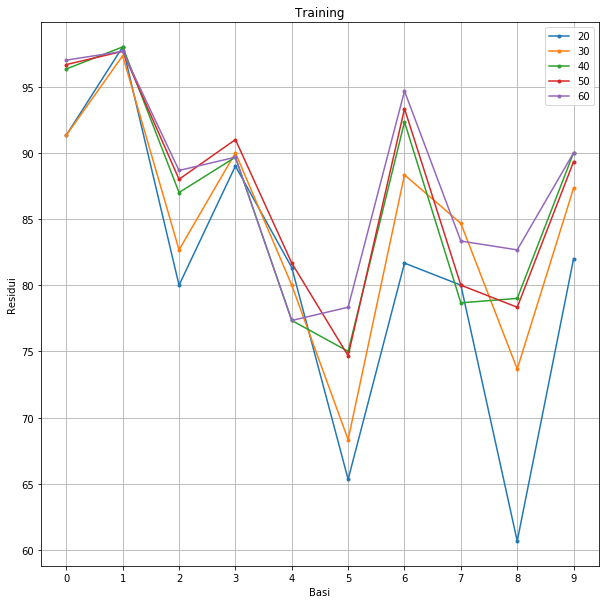

In [108]:
#residui per basi a diversa densità di training
import numpy as np
import matplotlib.pyplot as plt
transp=np.transpose(general)
fig = plt.figure(figsize=(10,10))
plt.xticks(range(10))
plt.yticks(range(50,100,5))
plt.xlabel("Basi")
plt.ylabel("Residui")
plt.plot(transp,marker='.')
plt.grid()
plt.title("Training")
x=range(20,70,10)
plt.legend(x)
plt.savefig("test_residuo(5)hosvd.png")

In [ ]:
def grafico(r):
    import numpy as np
    import matplotlib.pyplot as plt
    transp=np.transpose(r)
    fig = plt.figure(figsize=(10,10))
    plt.xticks(np.linspace(0,9,10,endpoint=True))
    plt.yticks(np.linspace(0,1,50,endpoint=True))
    plt.xlabel("Basi")
    plt.ylabel("Residui")
    plt.plot(transp,color="black",marker='.')
    plt.grid()
    plt.savefig("test_residuo(5)hosvd.png")

In [19]:
#Facciamo una statistica sull'efficacia del metodo
numero_statistica=0
for i in residuo_matrix:
    minimo_lista=min(i)
    for j in range(10):
        if (i[j] == minimo_lista and j==1):
            numero_statistica = numero_statistica +1
tot_perc=100*numero_statistica/n_prove
print(str(tot_perc)+"%")

97.66666666666667%


Posso creare un grafico che faccia vedere quantrer volte va fuori come un error plot